In [549]:
import pandas as pd

In [550]:
cancer_stylesheet = pd.read_csv('breast-cancer.csv')

In [551]:
cancer_stylesheet

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [552]:
import numpy as np

# taking the mean_area feature and casting it into a numpy array (type - float64)
mean_area_feature = np.array(cancer_stylesheet["mean_area"])

# feature scaling for the area
mean_area_feature_mean = mean_area_feature.mean()
mean_area_feature_stdev = mean_area_feature.std()

# updating the feature column
mean_area_feature = (mean_area_feature - mean_area_feature_mean) / mean_area_feature_stdev

In [553]:
# taking the mean_smoothness feature and casting it into a numpy array (type - float64)
mean_smoothness_feature = np.array(cancer_stylesheet["mean_smoothness"])

# feature scaling for the smoothness
mean_smoothness_feature_mean = mean_smoothness_feature.mean()
mean_smoothness_feature_stdev = mean_smoothness_feature.std()

# updating the feature column
mean_smoothness_feature = (mean_smoothness_feature - mean_smoothness_feature_mean) / mean_smoothness_feature_stdev

In [554]:
# taking the diagnosis column and storing it as a numpy array
diagnosis = np.array(cancer_stylesheet["diagnosis"]).astype("int32")

# turning the diagnosis array into targets array 
## The diagnosis of breast tissues (1 = malignant, 0 = benign) where malignant denotes that the disease is harmful
## Thus 1 => +1 and 0 => -1

targets = diagnosis.copy()
targets[targets == 0] = -1 ### diagnosis array won't be changed

In [555]:
import matplotlib.pyplot as plt

%matplotlib inline

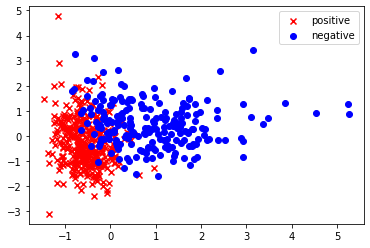

In [556]:
# let's plot the data points
# positive (malignant) = +1, negative (benign) = -1

# plotting positive diagnosis
plt.scatter(mean_area_feature[targets == 1], mean_smoothness_feature[targets == 1], color="red", marker='x', label="positive")
# plotting negative diagnosis
plt.scatter(mean_area_feature[targets == -1], mean_smoothness_feature[targets == -1], color="blue", marker='o', label="negative")

plt.legend()

In [557]:
# Adaline with batch gradient descent (or just GD)

class Adaline_GD:
    """Adaline with batch gradient descent
    
    ------------ Parameters for initialization ------------ 
    eta : float
        Learning rate (between 0.0 and 1.0) 
    n_iter : int
        Passes over the training dataset. 
    random_state : int
        Random number generator seed for random weight initialization.
        
        
    ------------ Properties defined in other methods -----------
    weights_ : 1d numpy array (vector)
        Weights after fitting. 
    costs_ : list
        Sum-of-squared-errors cost function value in each epoch.
    """
    
    # Constructor method
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    # Fitting method (in-place) => use weights_ or predict() after calling, for example
    def fit (self, features_matrix, targets):
        """Parameters
        
        features_matrix: 
            2D numpy array with a shape (# of examples, # of features)
        targets: 
            1D numpy array with size of (# of examples)
        """
        
        # initializing weights
        
        ## random number generator with the provided seed
        rgen = np.random.RandomState(self.random_state)
        
        ## weights will be normally distributed at a mean of 0, with stdec = 0.01
        ### features_matrix.shape[1] -> number of features
        ### +1 in the size is due to the bias weight
        self.weights_ = rgen.normal(loc=0.0, scale=0.01, size=1 + features_matrix.shape[1])
        
        # contains the result of the cost function after each epoch
        ## will be a pure python list
        self.costs_ = []
        
        # iterating through provided number of iterations/epochs
        for _ in range(self.n_iter):
            
            # activation values for all examples (in one np array)
            ## weighted_sum also works with matrices instead of vectors 
            ### as long as # of cols is the same
            act_values = self.weighted_sum(features_matrix)

            # errors vector
            errors = targets - act_values
            
            # calculating the cost: J
            cost = 0.5 * (errors ** 2).sum()
            
            print(cost)
            
            # calculating the delta weight vector
            delta_weight_vector = self.eta * np.dot(features_matrix.T, errors)
            
            delta_weight_bias = self.eta * errors.sum()
            
            # updating the weight vector
            self.weights_[1:] = delta_weight_vector
            self.weights_[0] = delta_weight_bias
            
            self.costs_.append(cost)
            
        return
    
    # return dot product of w.dot(x)
    ## note: w_0 = -theta and x_0 = 1, always
    def weighted_sum(self, example_vector):
        return np.dot(example_vector, self.weights_[1:]) + self.weights_[0]
    
    # Given an example vector returns +1 or -1 depending on the prediction
    def predict(self, example_vector):
        activation_value = self.weighted_sum(example_vector)
        
        return np.where(activation_value >= 0.0, 1, -1)
        

In [558]:
# preparing the inputs for the Adaline

features_matrix = np.zeros((mean_area_feature.size, 2))
features_matrix[:, 0] = mean_area_feature
features_matrix[:, 1] = mean_smoothness_feature

In [575]:
adaline_gd = Adaline_GD(eta=0.0013, n_iter = 50, random_state=1)
adaline_gd.fit(features_matrix, targets)

278.81317984800614
124.74146320470732
239.08696564053685
133.67070804886146
216.30909274586026
141.0598815427811
201.9040484348954
146.95307457815863
192.29214996688597
151.6319718459083
185.65635053930083
155.32836067696363
180.96564515995033
158.22930552104208
177.59252348983227
160.49079020945504
175.13574393702015
162.24336730284446
173.3290833051953
163.59492409045038
171.9907736624743
164.63315212300154
170.99387949404837
165.42824795895473
170.2481551026552
166.03570157081435
169.68851990456585
166.49894587602756
169.2675090933146
166.85171842278524
168.950196966912
167.12007350020411
168.71070554826446
167.3240428952244
168.52975721182756
167.4789761625604
168.39293144664362
167.5966049163012
168.28940663330167
167.68587809529188
168.2110420688279
167.75361184733077
168.15170243127423
167.80499194679328
168.10675725308653
167.84396035351932
168.0727080795548
167.87351156341282
168.0469095872673
167.8959191869804


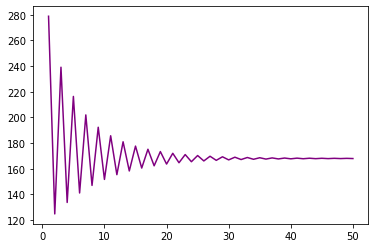

In [585]:
adaline_gd.costs_
plt.plot(range(1, adaline_gd.n_iter + 1), adaline_gd.costs_, color="purple")

In [578]:
adaline_gd.predict([
    [-0.06, 1.5],
    [-0.16, 2.5],
    [0.06, -0.5],
    [-0.09, 3]
])

array([-1, -1,  1, -1])

In [579]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 'x', 'o', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], 
                    alpha=0.8, c=colors[idx], 
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

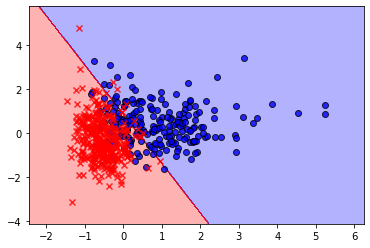

In [580]:
plot_decision_regions(features_matrix, targets, classifier=adaline_gd) 
plt.show()

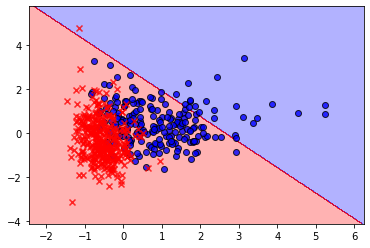

278.81317984800614


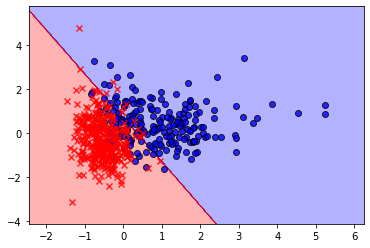

278.81317984800614
124.74146320470732


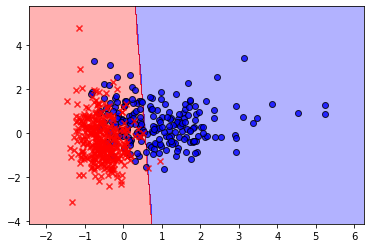

278.81317984800614
124.74146320470732
239.08696564053685


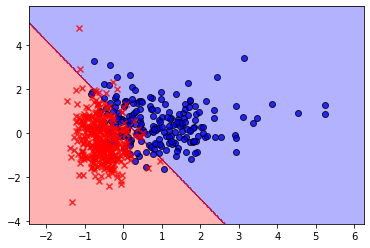

278.81317984800614
124.74146320470732
239.08696564053685
133.67070804886146


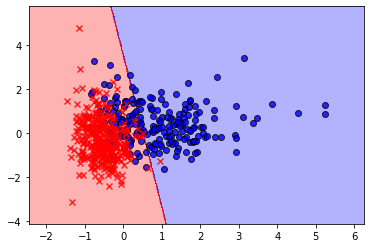

278.81317984800614
124.74146320470732
239.08696564053685
133.67070804886146
216.30909274586026


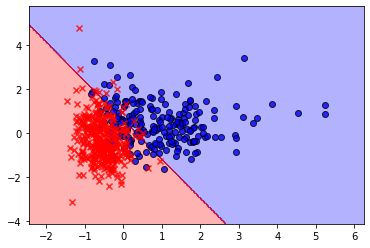

278.81317984800614
124.74146320470732
239.08696564053685
133.67070804886146
216.30909274586026
141.0598815427811


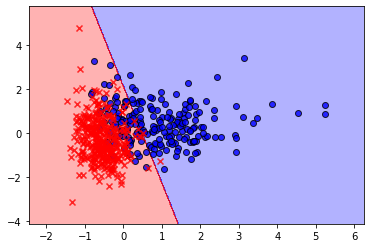

278.81317984800614
124.74146320470732
239.08696564053685
133.67070804886146
216.30909274586026
141.0598815427811
201.9040484348954


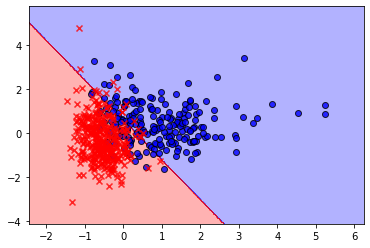

278.81317984800614
124.74146320470732
239.08696564053685
133.67070804886146
216.30909274586026
141.0598815427811
201.9040484348954
146.95307457815863


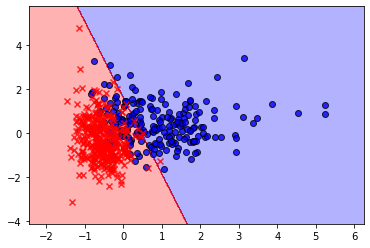

278.81317984800614
124.74146320470732
239.08696564053685
133.67070804886146
216.30909274586026
141.0598815427811
201.9040484348954
146.95307457815863
192.29214996688597


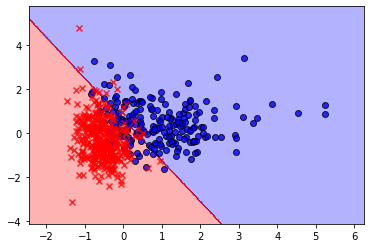

In [581]:
for i in range(10):
    ad = Adaline_GD(eta=0.0013, n_iter = i, random_state=1)
    ad.fit(features_matrix, targets)
    plot_decision_regions(features_matrix, targets, classifier=ad) 
    plt.show()